# Matsubara sums

We import the library to plot and define the same functions as in the last problem.

In [1]:
using PyPlot

In [2]:
t = 1.
μ = 0.
a = 1.;

In [3]:
ϵ(kx,ky) = -2*t*(cos(kx*a) + cos(ky*a))

ϵ (generic function with 1 method)

In [4]:
G(kx,ky,ν) = 1/(ν*im + ϵ(kx,ky) + μ)

G (generic function with 1 method)

In [12]:
ν(n,β) = (2*n + 1)*π/β

ν (generic function with 2 methods)

In [13]:
function getLocalG(points,n,β)
    
    X = zeros(points,points)
    Y = zeros(points,points)

    domain = linspace(-10,10,points)

    for i in 1:points
        X[1:end,i] = domain[i].*ones(points)
        Y[points-i+1,1:end] = domain[i].*ones(points)
    end
        
    sum = complex(0.)
    
    for i in 1:points
        for j in 1:points
            sum += G(X[i,j],Y[i,j],ν(n,β))
        end
    end
    
    return sum/(points^2)
    
end

getLocalG (generic function with 2 methods)

Now we define the fourier transform given on the exercise sheet

In [41]:
function fourierG(β,τ,freqLim)
    
    sum = complex(0.)
    
    for i in -freqLim:freqLim
        sum += getLocalG(100,i,β)*exp(-1*im*τ*ν(i,β))
    end
    
    sum = sum/β
    
    return sum
    
end

fourierG (generic function with 2 methods)

We perform our calculations for $N_k = 100$ and frequencies $\nu_n$ with $n\in[-25,25]$

In [43]:
β = 2.

domain = linspace(-β,β,100)
codomain = [fourierG(β,x,25) for x in domain]
realCo = real.(codomain)
imCo = imag.(codomain);

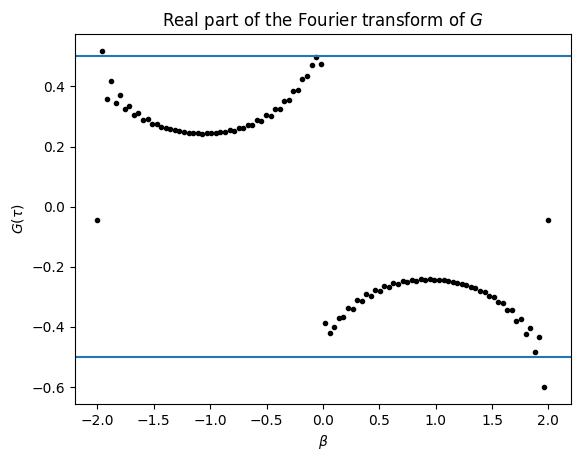

In [44]:
plot(domain,realCo, "k.")
axhline(-0.5)
axhline(0.5)
title(L"Real part of the Fourier transform of $G$")
xlabel(L"$\beta$")
ylabel(L"$G(\tau)$")
show()

**Show that $G^0_\sigma(0^+) = -1 + n_\sigma$ and $G^0_\sigma(\beta^+) = - n_\sigma$**

In the previous figure we can see that when we tend to zero from the right the value tends to $-0.5$ which is exactly $ -1 + n_\sigma$ for our case. When we tend to $\beta$ from the left the function tends to $-0.5$ also.

There seems to be some kind of noise there, which we attribute to a Gibbs phenomenon.

**Find and verify the symmetry property of $G_\sigma$**

$G_\sigma$ seems to be odd. We expected this kind of symmetry since we discussed that fact on the previous class

**Verify the convergence in the number of Matsubara frequencies**

Last time we used the $n$ values for the frequencies in the interval $[-25,25]$. Let's take now $[-40,40]$

In [45]:
β = 2.

domain = linspace(-β,β,100)
codomain = [fourierG(β,x,40) for x in domain]
realCo40 = real.(codomain)
imCo40 = imag.(codomain);

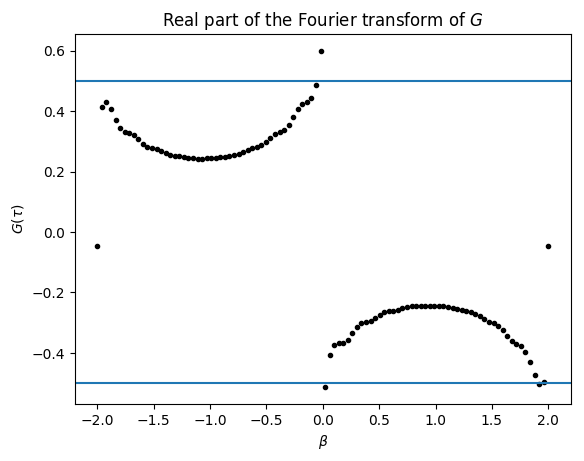

In [46]:
plot(domain,realCo40, "k.")
axhline(-0.5)
axhline(0.5)
title(L"Real part of the Fourier transform of $G$")
xlabel(L"$\beta$")
ylabel(L"$G(\tau)$")
show()

**Do you obtain the correct result?** 

No, the plots are still noisy in some regions.

**How can you improve the implementation?**

Adding more k's makes the calculations a little more precise near 0 and the boundaries. For example if we take 200 k's we get a plot like this

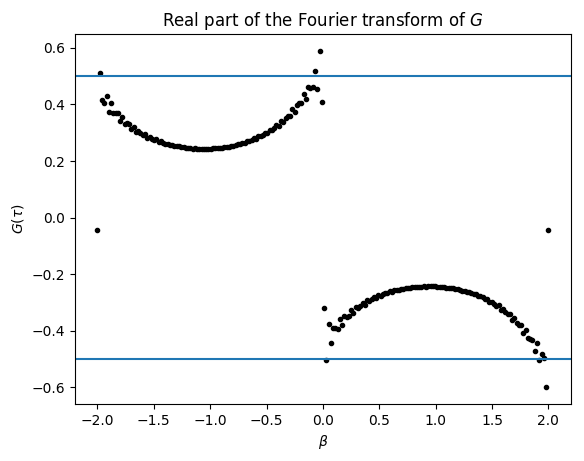

In [47]:
β = 2.

domain = linspace(-β,β,200)
codomain = [fourierG(β,x,40) for x in domain]
realCo40 = real.(codomain)
imCo40 = imag.(codomain);

plot(domain,realCo40, "k.")
axhline(-0.5)
axhline(0.5)
title(L"Real part of the Fourier transform of $G$")
xlabel(L"$\beta$")
ylabel(L"$G(\tau)$")
show()

In [48]:
function modifiedG(β,τ,freqLim)
    
    sum = complex(0.)
    
    for i in -freqLim:freqLim
        sum += (getLocalG(100,i,β) -1./(ν(i,β)*im))*exp(-1*im*τ*ν(i,β))
    end
    
    sum = -1/2 + sum/β
    
    return sum
    
end

modifiedG (generic function with 1 method)

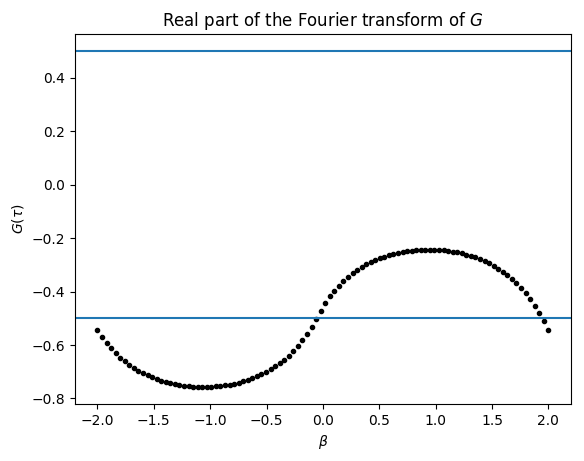

In [49]:
β = 2.

domain = linspace(-β,β,100)
codomain = [modifiedG(β,x,25) for x in domain]
realCoM = real.(codomain)
imCoM = imag.(codomain)

plot(domain,realCoM, "k.")
axhline(-0.5)
axhline(0.5)
title(L"Real part of the Fourier transform of $G$")
xlabel(L"$\beta$")
ylabel(L"$G(\tau)$")
show()

With the modification to the function we get the plot displayed above. The moral of the story here is: _since we know the symmetries of the function, we should only take the positive frequencies_.

If we use the known symmetries then we have the following plot

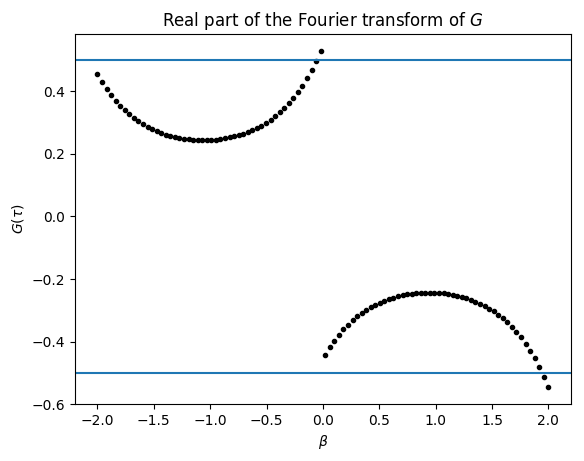

In [53]:
realCoM[1:50] = realCoM[1:50].+1.

plot(domain,realCoM, "k.")
axhline(-0.5)
axhline(0.5)
title(L"Real part of the Fourier transform of $G$")
xlabel(L"$\beta$")
ylabel(L"$G(\tau)$")
show()

We have a prettier plot now

**Self consistent calculations**

I'm really confused with this part, I don't really know what should I mix. Sorry